# arbol de desicion

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./Documents/Python Scripts/datasets/iris/iris.csv")

In [3]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

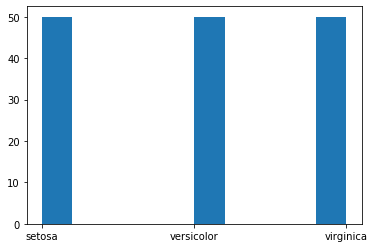

In [5]:
plt.hist(data.Species)

In [6]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [8]:
import numpy as np 

In [9]:
data["is_train"]= (np.random.uniform(0,1, len(data))<=0.75).astype(int)

(array([ 29.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 121.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

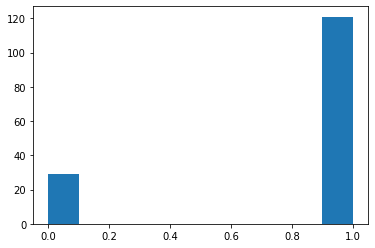

In [10]:
plt.hist(data.is_train)

In [11]:
train, test= data[data["is_train"]==True], data[data["is_train"]==False]

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99,)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [14]:
preds = tree.predict(test[predictors])

In [15]:
pd.crosstab(test[target], preds , rownames=["Actual"], colnames =["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,10,0,0
versicolor,0,11,0
virginica,0,1,7


# Visualizacion de árbol de decisión

In [16]:
from sklearn.tree import export_graphviz

In [17]:
with open("Documents/Python Scripts/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [18]:
import os
from graphviz import Source

In [19]:
file = open ("Documents/Python Scripts/resources/iris_dtree.dot", "r")
text= file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.584\\nsamples = 121\\nvalue = [40, 39, 42]"] ;\n1 [label="entropy = 0.0\\nsamples = 40\\nvalue = [40, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.999\\nsamples = 81\\nvalue = [0, 39, 42]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.378\\nsamples = 41\\nvalue = [0, 38, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.971\\nsamples = 5\\nvalue = [0, 2, 3]"] ;\n3 -> 5 ;\n6 [label="Petal.Length <= 4.85\\nentropy = 0.169\\nsamples = 40\\nvalue = [0, 1, 39]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 37\\nvalue = [0, 0, 37]"] ;\n6 -> 8 ;\n}'

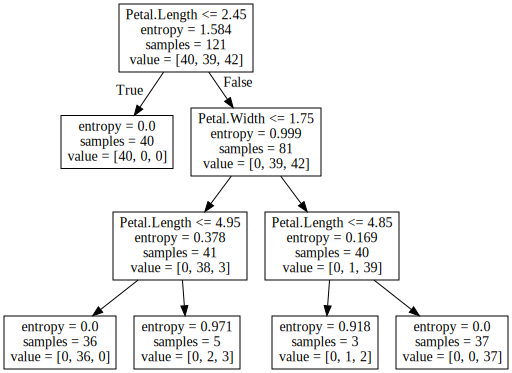

In [20]:
Source(text)

# cross validation para la poda

In [21]:
X = data[predictors]
Y = data[target]

In [23]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth =5, min_samples_split=20,random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [29]:
from sklearn.model_selection import KFold

In [38]:
cv = KFold ( K = X.shape[0], K_folds=10, shuffle=True ,random_state=1)

TypeError: __init__() got an unexpected keyword argument 'K'